In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Load dataset
df = pd.read_csv('OSBS_datasets/Cleaned_data/final_cleaned_dataset.csv', parse_dates=['datetime'])

In [70]:
df.head()

,datetime,soilCO2concentrationMean,soilCO2concentrationMinimum,soilCO2concentrationMaximum,soilCO2concentrationVariance,soilTempMean,soilTempMinimum,soilTempMaximum,soilTempVariance,VSWCMean,...,RHVariance,tempRHMean,tempRHMinimum,tempRHMaximum,tempRHVariance,dewTempMean,dewTempMinimum,dewTempMaximum,dewTempVariance,TFPrecipBulk
0,2021-01-01 00:00:00+00:00,1520.60,1511.08,1526.92,27.200,16.909,16.903,16.918,0.000022,0.0720,...,0.05,21.615,21.570,21.668,0.001,18.253,18.233,18.278,0.000,0.0
1,2021-01-01 00:01:00+00:00,1521.69,1508.72,1531.92,91.190,16.914,16.910,16.916,0.000005,0.0719,...,0.01,21.705,21.669,21.734,0.000,18.233,18.229,18.240,0.000,0.0
2,2021-01-01 00:02:00+00:00,1523.45,1512.77,1533.90,46.440,16.913,16.909,16.917,0.000009,0.0720,...,0.01,21.780,21.736,21.838,0.001,18.314,18.240,18.360,0.002,0.0
3,2021-01-01 00:03:00+00:00,1526.25,1515.16,1536.34,55.100,16.915,16.912,16.920,0.000008,0.0721,...,0.02,21.890,21.842,21.924,0.001,18.291,18.280,18.317,0.000,0.0
4,2021-01-01 00:04:00+00:00,1521.15,1518.53,1523.81,3.622,16.918,16.916,16.920,0.000002,0.0720,...,0.01,21.930,21.916,21.938,0.000,18.266,18.227,18.291,0.001,0.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193683 entries, 0 to 193682
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   datetime                      193683 non-null  datetime64[ns, UTC]
 1   soilCO2concentrationMean      193683 non-null  float64            
 2   soilCO2concentrationMinimum   193683 non-null  float64            
 3   soilCO2concentrationMaximum   193683 non-null  float64            
 4   soilCO2concentrationVariance  193683 non-null  float64            
 5   soilTempMean                  193683 non-null  float64            
 6   soilTempMinimum               193683 non-null  float64            
 7   soilTempMaximum               193683 non-null  float64            
 8   soilTempVariance              193683 non-null  float64            
 9   VSWCMean                      193683 non-null  float64            
 10  VSWCMinimum         

In [72]:
df.isnull().sum()

datetime                        0
soilCO2concentrationMean        0
soilCO2concentrationMinimum     0
soilCO2concentrationMaximum     0
soilCO2concentrationVariance    0
soilTempMean                    0
soilTempMinimum                 0
soilTempMaximum                 0
soilTempVariance                0
VSWCMean                        0
VSWCMinimum                     0
VSWCMaximum                     0
VSWCVariance                    0
VSICMean                        0
VSICMinimum                     0
VSICMaximum                     0
VSICVariance                    0
windSpeedMean                   0
windSpeedMinimum                0
windSpeedMaximum                0
windSpeedVariance               0
windDirMean                     0
windDirVariance                 0
RHMean                          0
RHMinimum                       0
RHMaximum                       0
RHVariance                      0
tempRHMean                      0
tempRHMinimum                   0
tempRHMaximum 

In [73]:
# Set datetime as index
df.set_index('datetime', inplace=True)

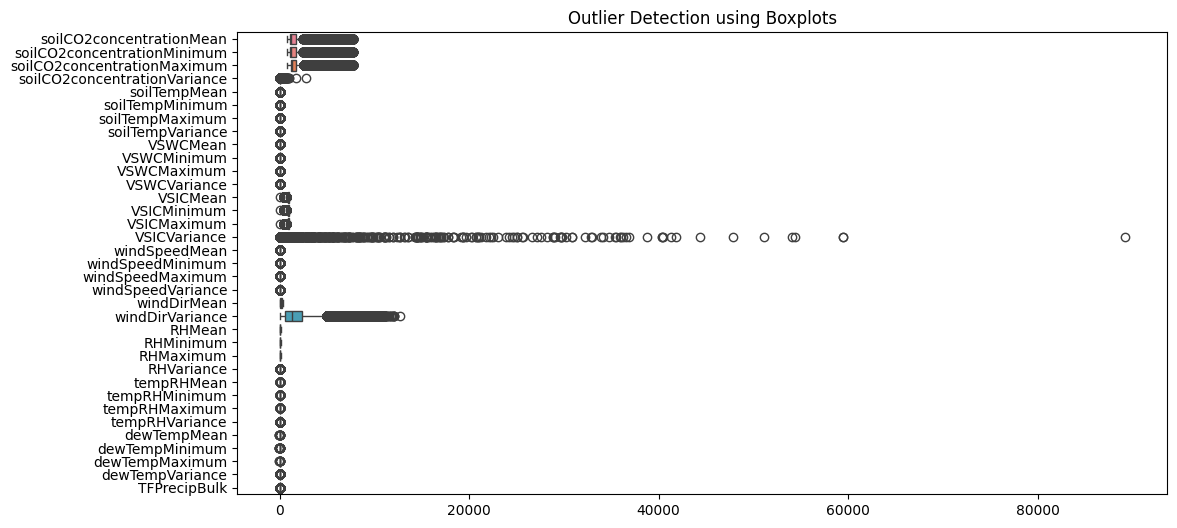

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Outlier Detection using Boxplots")
plt.show()


In [74]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[col] = np.clip(df[col], lower, upper)

    return df
# Columns to check for outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df = remove_outliers_iqr(df, numeric_cols)

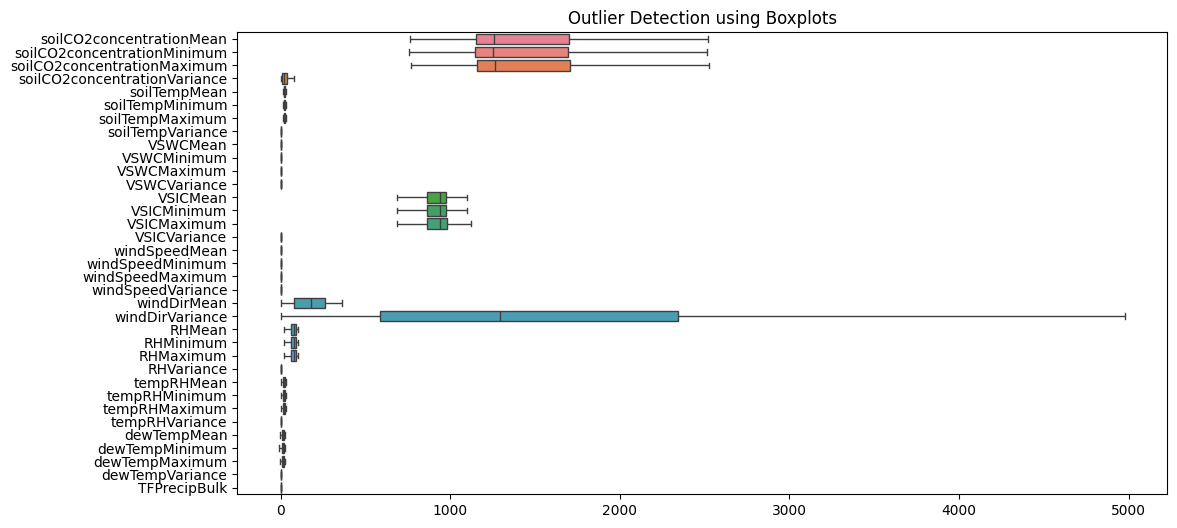

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Outlier Detection using Boxplots")
plt.show()


In [75]:
df.shape

(193683, 35)

In [76]:
# Identify columns by type (Mean, Min, Max, Variance)
mean_cols = [col for col in df.columns if 'Mean' in col]
min_cols = [col for col in df.columns if 'Minimum' in col]
max_cols = [col for col in df.columns if 'Maximum' in col]
var_cols = [col for col in df.columns if 'Variance' in col]

# Resample to 30-minute intervals
df_30min = pd.DataFrame()

In [77]:
# Compute mean, min, max, variance for each group of columns
df_30min[mean_cols] = df[mean_cols].resample('30min').mean()
df_30min[min_cols] = df[min_cols].resample('30min').min()
df_30min[max_cols] = df[max_cols].resample('30min').max()
df_30min[var_cols] = df[var_cols].resample('30min').var()

# Reset index to make 'etime' a column again
df_30min = df_30min.reset_index()


In [78]:
df_30min.tail(10)

,datetime,soilCO2concentrationMean,soilTempMean,VSWCMean,VSICMean,windSpeedMean,windDirMean,RHMean,tempRHMean,dewTempMean,...,dewTempMaximum,soilCO2concentrationVariance,soilTempVariance,VSWCVariance,VSICVariance,windSpeedVariance,windDirVariance,RHVariance,tempRHVariance,dewTempVariance
8603,2021-06-29 05:30:00+00:00,2521.8775,26.264267,0.070057,886.173367,0.159500,66.285500,94.336667,22.957233,21.950867,...,21.9900,478.696426,3.950759e-12,0.0,0.000114,0.000009,2.016587e+06,3.333333e-06,0.0,0.000000e+00
8604,2021-06-29 06:00:00+00:00,2521.8775,26.081400,0.070000,886.246767,0.165833,73.954167,94.877667,22.862900,21.950967,...,22.0000,524.447359,1.256420e-11,0.0,0.000228,0.000017,7.734240e+05,0.000000e+00,0.0,0.000000e+00
8605,2021-06-29 06:30:00+00:00,2521.8775,25.912467,0.069917,886.404900,0.140167,37.259500,95.715000,22.711167,21.944333,...,22.0040,389.748161,3.894713e-12,0.0,0.000074,0.000005,1.416360e+06,0.000000e+00,0.0,0.000000e+00
8606,2021-06-29 07:00:00+00:00,2521.8775,25.766900,0.069817,886.496533,0.142333,58.227333,95.920667,22.636600,21.905500,...,21.9520,324.367977,7.151264e-13,0.0,0.000186,0.000036,3.056847e+06,0.000000e+00,0.0,0.000000e+00
8607,2021-06-29 07:30:00+00:00,2521.8775,25.645467,0.069750,886.564733,0.085333,95.536500,93.890667,23.160233,22.073400,...,22.2650,372.595066,1.219126e-12,0.0,0.000126,0.000000,1.915210e+06,1.702299e-04,0.0,2.574713e-07
8608,2021-06-29 08:00:00+00:00,2521.8775,25.534167,0.069700,886.772500,0.130500,139.771667,92.134000,23.635067,22.234333,...,22.3090,562.066782,2.890678e-12,0.0,0.000143,0.000000,2.099199e+06,1.006897e-04,0.0,0.000000e+00
8609,2021-06-29 08:30:00+00:00,2521.8775,25.418000,0.069607,886.899867,0.073500,268.586333,93.324000,23.556967,22.368400,...,22.4520,335.886073,2.602540e-12,0.0,0.000136,0.000000,2.932670e+06,0.000000e+00,0.0,0.000000e+00
8610,2021-06-29 09:00:00+00:00,2521.8775,25.303467,0.069530,886.939567,0.098500,136.980000,93.681000,23.600300,22.473800,...,22.5490,608.158071,2.911368e-12,0.0,0.000352,0.000000,1.622014e+06,2.540230e-05,0.0,0.000000e+00
8611,2021-06-29 09:30:00+00:00,2521.8775,25.188833,0.069487,887.161433,0.156167,38.990167,96.685950,22.861312,22.255457,...,22.4110,427.467858,1.277471e-12,0.0,0.000222,0.000017,1.976650e+06,3.819308e-05,0.0,2.341492e-07
8612,2021-06-29 10:00:00+00:00,2521.8775,25.128500,0.069400,887.302000,0.145000,16.355000,96.459917,22.960529,22.283012,...,22.2982,783.565284,5.000000e-15,0.0,0.000968,0.000000,1.893586e+03,1.701389e-07,0.0,3.472222e-11


In [79]:
print("Resampling complete. Dataset shape:", df_30min.shape)


Resampling complete. Dataset shape: (8613, 35)


In [80]:
df_30min.isnull().sum()

datetime                           0
soilCO2concentrationMean        2042
soilTempMean                    2042
VSWCMean                        2042
VSICMean                        2042
windSpeedMean                   2042
windDirMean                     2042
RHMean                          2042
tempRHMean                      2042
dewTempMean                     2042
soilCO2concentrationMinimum     2042
soilTempMinimum                 2042
VSWCMinimum                     2042
VSICMinimum                     2042
windSpeedMinimum                2042
RHMinimum                       2042
tempRHMinimum                   2042
dewTempMinimum                  2042
soilCO2concentrationMaximum     2042
soilTempMaximum                 2042
VSWCMaximum                     2042
VSICMaximum                     2042
windSpeedMaximum                2042
RHMaximum                       2042
tempRHMaximum                   2042
dewTempMaximum                  2042
soilCO2concentrationVariance    2046
s

In [81]:
# Optional: save to a new CSV
df_30min.to_csv('OSBS_datasets/Cleaned_data/NEON_30min_aggregated_data.csv', index=False)